In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
dataset = pd.read_csv('cluster-sample-data.csv')

In [3]:
dataset.head(7)

,ID,F1,F2
0,1,1.0,1.0
1,2,1.5,2.0
2,3,3.0,4.0
3,4,5.0,7.0
4,5,3.5,5.0
5,6,4.5,5.0
6,7,3.5,4.5


<AxesSubplot:xlabel='F1', ylabel='F2'>

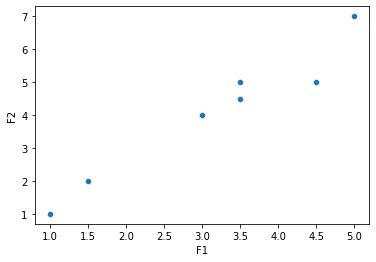

In [4]:
sns.scatterplot(x=dataset['F1'], y=dataset['F2'])

In [5]:
X = dataset.iloc[:, [1, 2]].values

In [6]:
X

array([[1. , 1. ],
       [1.5, 2. ],
       [3. , 4. ],
       [5. , 7. ],
       [3.5, 5. ],
       [4.5, 5. ],
       [3.5, 4.5]])

In [10]:
# create k-means object and fit the data
kmeans = KMeans(n_clusters = 4, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [11]:
y_kmeans

array([1, 1, 3, 2, 3, 0, 3])

<AxesSubplot:>

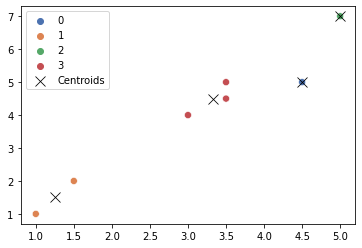

In [12]:
# visualize the cluster
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue = y_kmeans, palette = 'deep', s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], label = 'Centroids', color='0.0', s=100, marker='x')

C:\Users\laila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


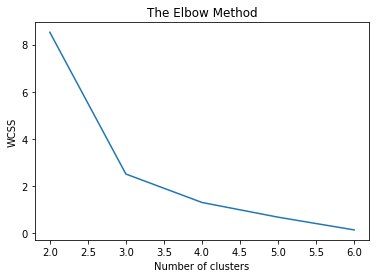

In [10]:
# determining the value of k
wcss = []
for i in range(2, 7):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
sns.lineplot(range(2, 7), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
kmeans.cluster_centers_

array([[4.5       , 5.        ],
       [1.25      , 1.5       ],
       [5.        , 7.        ],
       [3.33333333, 4.5       ]])